In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df1 =pd.read_excel("data.xlsx")

In [14]:
df1

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
...,...,...,...
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149


In [15]:
df1.isna().sum()

Date    0
GHI     0
PR      0
dtype: int64

In [16]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    982 non-null    datetime64[ns]
 1   GHI     982 non-null    float64       
 2   PR      982 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.1 KB


In [17]:
df1.describe()

,GHI,PR
count,982.000000,982.000000
mean,4.626093,72.648608
std,1.029305,7.292026
min,1.413825,60.023886
25%,4.013435,66.248200
50%,4.740896,72.895357
75%,5.315469,79.031818
max,6.947317,84.980120


In [18]:
df1['GHI_interval'] = pd.cut(df1['GHI'],[0,2,4,6,10], right=False, include_lowest=True)
df1

,Date,GHI,PR,GHI_interval
0,2019-07-01,3.256608,69.575676,"[2, 4)"
1,2019-07-02,3.976767,79.314411,"[2, 4)"
2,2019-07-03,2.811867,61.020006,"[2, 4)"
3,2019-07-04,3.658408,83.262576,"[2, 4)"
4,2019-07-05,5.590683,82.124440,"[4, 6)"
...,...,...,...,...
977,2022-03-20,4.226183,81.632738,"[4, 6)"
978,2022-03-21,3.431675,71.057353,"[2, 4)"
979,2022-03-22,3.580492,81.631509,"[2, 4)"
980,2022-03-23,4.997617,71.906149,"[4, 6)"


In [19]:
df1['rol_pr']= df1['PR'].rolling(30).mean()
df1

,Date,GHI,PR,GHI_interval,rol_pr
0,2019-07-01,3.256608,69.575676,"[2, 4)",NaN
1,2019-07-02,3.976767,79.314411,"[2, 4)",NaN
2,2019-07-03,2.811867,61.020006,"[2, 4)",NaN
3,2019-07-04,3.658408,83.262576,"[2, 4)",NaN
4,2019-07-05,5.590683,82.124440,"[4, 6)",NaN
...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,"[4, 6)",71.181262
978,2022-03-21,3.431675,71.057353,"[2, 4)",70.789540
979,2022-03-22,3.580492,81.631509,"[2, 4)",71.231840
980,2022-03-23,4.997617,71.906149,"[4, 6)",71.249772


In [20]:
df1['rol_pr'].isna().sum()

29

In [26]:
conditions = [
    (df1['Date'] >= pd.to_datetime('2019-07-01')) &   (df1['Date'] < pd.to_datetime('2020-07-01')),
    (df1['Date'] >= pd.to_datetime('2020-07-01')) & (df1['Date'] < pd.to_datetime('2021-07-01')),
    (df1['Date'] >= pd.to_datetime('2021-07-01')),
    ]
values = [73.9, 73.9*0.992,73.9*0.992*0.992]
df1['BL'] = np.select(conditions, values)
df1

,Date,GHI,PR,GHI_interval,rol_pr,BL
0,2019-07-01,3.256608,69.575676,"[2, 4)",NaN,73.90000
1,2019-07-02,3.976767,79.314411,"[2, 4)",NaN,73.90000
2,2019-07-03,2.811867,61.020006,"[2, 4)",NaN,73.90000
3,2019-07-04,3.658408,83.262576,"[2, 4)",NaN,73.90000
4,2019-07-05,5.590683,82.124440,"[4, 6)",NaN,73.90000
...,...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,"[4, 6)",71.181262,72.72233
978,2022-03-21,3.431675,71.057353,"[2, 4)",70.789540,72.72233
979,2022-03-22,3.580492,81.631509,"[2, 4)",71.231840,72.72233
980,2022-03-23,4.997617,71.906149,"[4, 6)",71.249772,72.72233


In [28]:
avglf=df1['PR'].mean()
avg365=df1['PR'].rolling(365).mean()[981]
avg90=df1['PR'].rolling(90).mean()[981]
avg60=df1['PR'].rolling(60).mean()[981]
avg30=df1['PR'].rolling(30).mean()[981]
avg7=df1['PR'].rolling(7).mean()[981]


<function matplotlib.pyplot.show(close=None, block=None)>

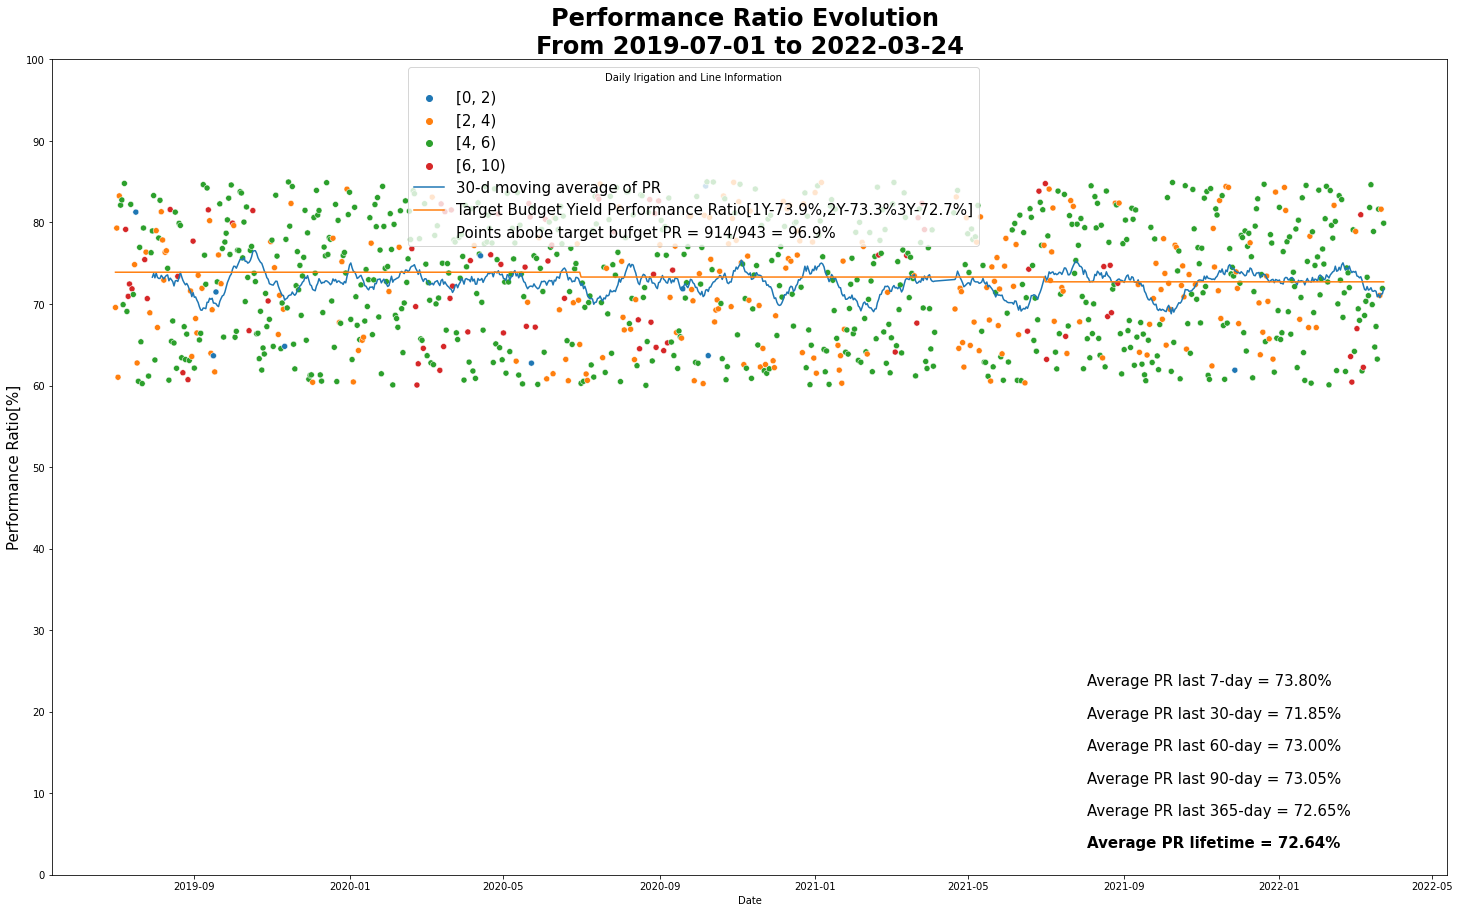

In [38]:
ig, ax = plt.subplots(figsize=(25, 15))
p1 = sns.scatterplot(x=df["Date"], y=df1["PR"], hue=df1["GHI_interval"])
sns.lineplot(x = df1["Date"],y = df1["rol_pr"],label = "30-d moving average of PR")
sns.lineplot(x = df1["Date"],y = df1["BL"],label="Target Budget Yield Performance Ratio[1Y-73.9%,2Y-73.3%3Y-72.7%]")
plt.plot([], [], ' ', label="Points abobe target bufget PR = 914/943 = 96.9%")

ax.legend(title='Daily Irigation and Line Information',ncol =1, bbox_to_anchor=(0.25, 1), loc='upper left',fontsize = 15)
plt.figtext(0.7,0.15,'Average PR lifetime = '+str(avglf)[0:5]+'%', fontsize = 15,fontweight = "bold")
plt.figtext(0.7,0.18,'Average PR last 365-day = '+str(avg365)[0:5]+'%', fontsize = 15)
plt.figtext(0.7,0.21,'Average PR last 90-day = '+str(avg90)[0:5]+'%', fontsize = 15)
plt.figtext(0.7,0.24,'Average PR last 60-day = '+str(avg60)[0:5]+'%', fontsize = 15)
plt.figtext(0.7,0.27,'Average PR last 30-day = '+str(avg30)[0:5]+'%', fontsize = 15)
plt.figtext(0.7,0.3,'Average PR last 7-day = '+str(avg7)[0:5]+'%', fontsize = 15)
p1.set_ylabel("Performance Ratio[%]", fontsize = 15)
p1.set_title("Performance Ratio Evolution \nFrom 2019-07-01 to 2022-03-24",fontsize = 24,fontweight = "bold")

plt.ylim(0,100)
plt.yticks(np.arange(0,101,10))
plt.show